# Figure Notebook

In [51]:
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np
from visualization import *
import dill
from helpers import L2, maxnorm, minmax, maxmax, softmax, standard

# add a title to plots (False fo ICML template)
TITLE=False
# save figures
SAVE=True

In [52]:
plt.rc('legend', fontsize='small')
plt.style.use('bmh')

## Federated Learning

CMs vs sizes experiment

In [53]:
# sizes: [40% 30% 20% 10%]
# label accuracy: [100% 100% 100% 100%]
# feature noise: [0.0, 0.0, 0.0, 0.0]

directory = './saves/FL_n4_r100_04_06_03h47/'
dill.load_session(directory + 'variables.pckl')

xticklabel = ['40%', '30%', '20%', '10%']
xlabel = 'Fraction of total dataset'
title = 'Dataset Size'
subscript = 'size'

CMs vs label accuracy experiment

In [8]:
# sizes: [25% 25% 25% 25%]
# label accuracy: [100% 98% 96% 94%]
# feature noise: [0.0, 0.0, 0.0, 0.0]

directory = './saves/FL_n4_r100_26_05_03h29/'
dill.load_session(directory + 'variables.pckl')

xticklabel = ['100%', '98%', '96%', '94%']
xlabel = 'Label Accuracy'
title = 'Label Accuracy'
subscript = 'yacc'

CMs vs feature accuracy experiment

In [13]:
# sizes: [25% 25% 25% 25%]
# label accuracy: [100% 100% 100% 100%]
# feature noise: [0.0, 0.1, 0.2, 0.3]

directory = './saves/FL_n4_r100_04_06_17h07/'
dill.load_session(directory + 'variables.pckl')

xticklabel = ['0.0', '0.1', '0.2', '0.3']
xlabel = 'Feature Noise'
title = 'feature Accuracy'
subscript = 'xnoise'

### CMs (per round)

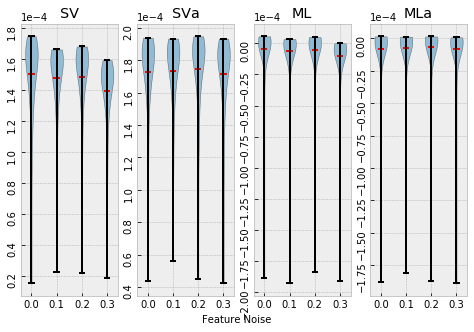

In [14]:
# Parameters

fig, axs = plt.subplots(1 , 4, figsize=(8, 5), sharex=True)

for i in range(4):
    axs[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    [tick.set_rotation(90) for tick in axs[i].get_yticklabels()]
# titles

if TITLE:
    fig.suptitle('Contribution Measures in FL')
axs[0].set_title('SV')
axs[1].set_title('SVa')
axs[2].set_title('ML')
axs[3].set_title('MLa')


# violin plot
parts = {}
parts[0] = axs[0].violinplot(SV, showmeans=True)
parts[1] = axs[1].violinplot(SVa, showmeans=True)
parts[2] = axs[2].violinplot(ML, showmeans=True)
parts[3] = axs[3].violinplot(MLa, showmeans=True)

# x labels
axs[3].set_xticks([1,2,3,4])
axs[3].set_xticklabels(xticklabel)
fig.text(0.5, 0.05, xlabel, ha='center')

# style
for i in range(4):
    for pc in parts[i]['bodies']:
        #pc.set_facecolor('#FAC205')
        pc.set_edgecolor('black')
        pc.set_alpha(0.5)
    parts[i]['cmeans'].set_edgecolor('r')
    parts[i]['cmins'].set_edgecolor('k')
    parts[i]['cmaxes'].set_edgecolor('k')
    parts[i]['cbars'].set_edgecolor('k')
        
# save
if SAVE:
    plt.savefig('./figures/FL_CMs_' + subscript + '.png')
    
plt.show()

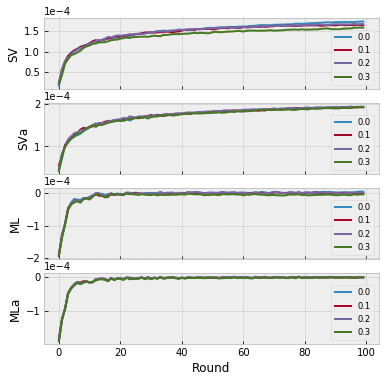

In [15]:
fig, axs = plt.subplots(4 , 1, figsize=(6, 6), sharex=True)

if TITLE:
    fig.suptitle('CMs in FL vs ' + title + ' (training history)', y=0.92)

for i in range(4):
    axs[i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    
axs[0].plot(SV[:,0])
axs[0].plot(SV[:,1])
axs[0].plot(SV[:,2])
axs[0].plot(SV[:,3])

axs[1].plot(SVa[:,0])
axs[1].plot(SVa[:,1])
axs[1].plot(SVa[:,2])
axs[1].plot(SVa[:,3])

axs[2].plot(ML[:,0])
axs[2].plot(ML[:,1])
axs[2].plot(ML[:,2])
axs[2].plot(ML[:,3])

axs[3].plot(MLa[:,0])
axs[3].plot(MLa[:,1])
axs[3].plot(MLa[:,2])
axs[3].plot(MLa[:,3])

axs[0].legend(xticklabel, loc='lower right')
axs[1].legend(xticklabel, loc='lower right')
axs[2].legend(xticklabel, loc='lower right')
axs[3].legend(xticklabel, loc='lower right')

axs[0].set_ylabel('SV')
axs[1].set_ylabel('SVa')
axs[2].set_ylabel('ML')
axs[3].set_ylabel('MLa')

axs[3].set_xlabel('Round')

if SAVE:
    plt.savefig('./figures/FL_CMs_hist_' + subscript + '.png')

plt.show()

### Normalized CMS


Per per round

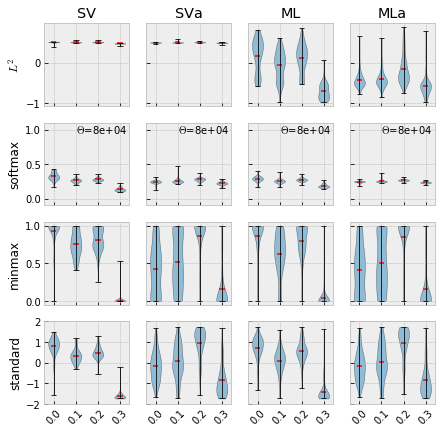

In [16]:
# parameters
SHOWMEANS = True
THETA = 80000

fig, axs = plt.subplots(4 , 4, figsize=(7, 7), sharex=True, sharey='row')

# title
if TITLE:
    fig.suptitle('Normalized CMs in FL vs ' + title, y=0.95, fontsize=13)

# Violin plots
parts = {}
parts[0,0] = axs[0,0].violinplot(L2(SV), showmeans=SHOWMEANS)
parts[1,0] = axs[1,0].violinplot(softmax(SV, theta=THETA), showmeans=SHOWMEANS)
parts[2,0] = axs[2,0].violinplot(minmax(SV), showmeans=SHOWMEANS)
parts[3,0] = axs[3,0].violinplot(standard(SV), showmeans=SHOWMEANS)

parts[0,1] = axs[0,1].violinplot(L2(SVa), showmeans=SHOWMEANS)
parts[1,1] = axs[1,1].violinplot(softmax(SVa, theta=THETA), showmeans=SHOWMEANS)
parts[2,1] = axs[2,1].violinplot(minmax(SVa), showmeans=SHOWMEANS)
parts[3,1] = axs[3,1].violinplot(standard(SVa), showmeans=SHOWMEANS)

parts[0,2] = axs[0,2].violinplot(L2(ML), showmeans=SHOWMEANS)
parts[1,2] = axs[1,2].violinplot(softmax(ML, theta=THETA), showmeans=SHOWMEANS)
parts[2,2] = axs[2,2].violinplot(minmax(ML), showmeans=SHOWMEANS)
parts[3,2] = axs[3,2].violinplot(standard(ML), showmeans=SHOWMEANS)

parts[0,3] = axs[0,3].violinplot(L2(MLa), showmeans=SHOWMEANS)
parts[1,3] = axs[1,3].violinplot(softmax(MLa, theta=THETA), showmeans=SHOWMEANS)
parts[2,3] = axs[2,3].violinplot(minmax(MLa), showmeans=SHOWMEANS)
parts[3,3] = axs[3,3].violinplot(standard(MLa), showmeans=SHOWMEANS)


# y labels
axs[0,0].set_ylabel('$L^2$')
axs[1,0].set_ylabel('softmax')
axs[1,0].set_ylim([-0.1, 1.1])

axs[2,0].set_ylabel('minmax')
axs[3,0].set_ylabel('standard')
axs[3,0].set_ylim([-2, 2])

# x labels
axs[3,0].set_xticks([1,2,3,4])
axs[3,0].set_xticklabels(xticklabel, rotation=45)
axs[3,1].set_xticks([1,2,3,4])
axs[3,1].set_xticklabels(xticklabel, rotation=45)
axs[3,2].set_xticks([1,2,3,4])
axs[3,2].set_xticklabels(xticklabel, rotation=45)
axs[3,3].set_xticks([1,2,3,4])
axs[3,3].set_xticklabels(xticklabel, rotation=45)

axs[0,0].set_title('SV')
axs[0,1].set_title('SVa')
axs[0,2].set_title('ML')
axs[0,3].set_title('MLa')

# theta
axs[1,0].text(2, 0.95, '$\Theta$={:.0e}'.format(THETA))
axs[1,1].text(2, 0.95, '$\Theta$={:.0e}'.format(THETA))
axs[1,2].text(2, 0.95, '$\Theta$={:.0e}'.format(THETA))
axs[1,3].text(2, 0.95, '$\Theta$={:.0e}'.format(THETA))

# plot style
for i in range(4):
    for j in range(4):
        for pc in parts[i,j]['bodies']:
            #pc.set_facecolor('#FAC205')
            pc.set_edgecolor('black')
            pc.set_alpha(0.5)
        parts[i,j]['cmeans'].set_edgecolor('r')
        parts[i,j]['cmeans'].set_linewidth(1.5)
        parts[i,j]['cmins'].set_edgecolor('k')
        parts[i,j]['cmaxes'].set_edgecolor('k')
        parts[i,j]['cbars'].set_edgecolor('k')
        parts[i,j]['cbars'].set_linewidth(0.8)
        parts[i,j]['cmaxes'].set_linewidth(0.8)
        parts[i,j]['cmins'].set_linewidth(0.8)

        
# save
if SAVE:
    plt.savefig('./figures/FL_norm_CMs_' + subscript + '.png')
    
plt.show()

Cumulative

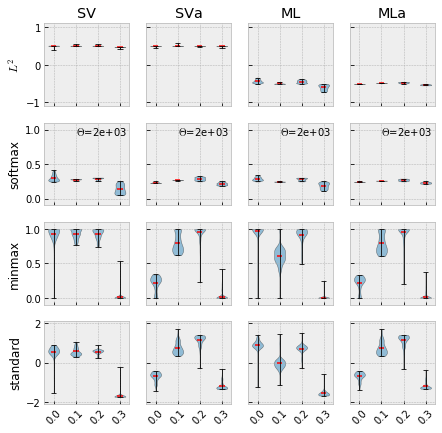

In [17]:
# parameters
SHOWMEANS = True
THETA = 2000

fig, axs = plt.subplots(4 , 4, figsize=(7, 7), sharex=True, sharey='row')

# title
if TITLE:
    fig.suptitle('Normalized Cumulative CMs in FL vs ' + title, y=0.95, fontsize=13)

# Violin plots
parts = {}
parts[0,0] = axs[0,0].violinplot(L2(np.cumsum(SV, axis=0)), showmeans=SHOWMEANS)
parts[1,0] = axs[1,0].violinplot(softmax(np.cumsum(SV, axis=0), theta=THETA), showmeans=SHOWMEANS)
parts[2,0] = axs[2,0].violinplot(minmax(np.cumsum(SV, axis=0)), showmeans=SHOWMEANS)
parts[3,0] = axs[3,0].violinplot(standard(np.cumsum(SV, axis=0)), showmeans=SHOWMEANS)

parts[0,1] = axs[0,1].violinplot(L2(np.cumsum(SVa, axis=0)), showmeans=SHOWMEANS)
parts[1,1] = axs[1,1].violinplot(softmax(np.cumsum(SVa, axis=0), theta=THETA), showmeans=SHOWMEANS)
parts[2,1] = axs[2,1].violinplot(minmax(np.cumsum(SVa, axis=0)), showmeans=SHOWMEANS)
parts[3,1] = axs[3,1].violinplot(standard(np.cumsum(SVa, axis=0)), showmeans=SHOWMEANS)

parts[0,2] = axs[0,2].violinplot(L2(np.cumsum(ML, axis=0)), showmeans=SHOWMEANS)
parts[1,2] = axs[1,2].violinplot(softmax(np.cumsum(ML, axis=0), theta=THETA), showmeans=SHOWMEANS)
parts[2,2] = axs[2,2].violinplot(minmax(np.cumsum(ML, axis=0)), showmeans=SHOWMEANS)
parts[3,2] = axs[3,2].violinplot(standard(np.cumsum(ML, axis=0)), showmeans=SHOWMEANS)

parts[0,3] = axs[0,3].violinplot(L2(np.cumsum(MLa, axis=0)), showmeans=SHOWMEANS)
parts[1,3] = axs[1,3].violinplot(softmax(np.cumsum(MLa, axis=0), theta=THETA), showmeans=SHOWMEANS)
parts[2,3] = axs[2,3].violinplot(minmax(np.cumsum(MLa, axis=0)), showmeans=SHOWMEANS)
parts[3,3] = axs[3,3].violinplot(standard(np.cumsum(MLa, axis=0)), showmeans=SHOWMEANS)


# y labels
axs[0,0].set_ylabel('$L^2$')
axs[1,0].set_ylabel('softmax')


axs[2,0].set_ylabel('minmax')
axs[3,0].set_ylabel('standard')
#axs[3,0].set_ylim([-5, 5])

axs[0,0].set_ylim([-1.1, 1.1])
axs[1,0].set_ylim([-0.1, 1.1])
axs[2,0].set_ylim([-0.1, 1.1])
axs[3,0].set_ylim([-2.1, 2.1])

# x labels
axs[3,0].set_xticks([1,2,3,4])
axs[3,0].set_xticklabels(xticklabel, rotation=45)

axs[3,1].set_xticks([1,2,3,4])
axs[3,1].set_xticklabels(xticklabel, rotation=45)

axs[3,2].set_xticks([1,2,3,4])
axs[3,2].set_xticklabels(xticklabel, rotation=45)

axs[3,3].set_xticks([1,2,3,4])
axs[3,3].set_xticklabels(xticklabel, rotation=45)

axs[0,0].set_title('SV')
axs[0,1].set_title('SVa')
axs[0,2].set_title('ML')
axs[0,3].set_title('MLa')

# theta
axs[1,0].text(2, 0.92, '$\Theta$={:.0e}'.format(THETA))
axs[1,1].text(2, 0.92, '$\Theta$={:.0e}'.format(THETA))
axs[1,2].text(2, 0.92, '$\Theta$={:.0e}'.format(THETA))
axs[1,3].text(2, 0.92, '$\Theta$={:.0e}'.format(THETA))

# plot style
for i in range(4):
    for j in range(4):
        for pc in parts[i,j]['bodies']:
            #pc.set_facecolor('#FAC205')
            pc.set_edgecolor('black')
            pc.set_alpha(0.5)
        parts[i,j]['cmeans'].set_edgecolor('r')
        parts[i,j]['cmeans'].set_linewidth(1.5)
        parts[i,j]['cmins'].set_edgecolor('k')
        parts[i,j]['cmaxes'].set_edgecolor('k')
        parts[i,j]['cbars'].set_edgecolor('k')
        parts[i,j]['cbars'].set_linewidth(0.8)
        parts[i,j]['cmaxes'].set_linewidth(0.8)
        parts[i,j]['cmins'].set_linewidth(0.8)
        
# save
if SAVE:
    plt.savefig('./figures/FL_norm_CMs_cum_' + subscript + '.png')
plt.show()

## Peer-to-peer Learning

CMs vs dataset sizes experiment

In [45]:
# sizes: [40% 30% 20% 10%]
# label accuracy: [100% 100% 100% 100%]
directory = './saves/P2PL_n4_r100_04_06_18h32/'
dill.load_session(directory + 'variables.pckl')

xticklabel = ['40%', '30%', '20%', '10%']
xlabel = 'Fraction of total dataset'
title = 'Dataset Size'
subscript = 'size'

CMs vs label accuracy experiment

In [47]:
# sizes: [25% 25% 25% 25%]
# label accuracy: [100% 98% 96% 94%]
# feature noise: [0.0, 0.0, 0.0, 0.0]

directory = './saves/P2PL_n4_r100_04_06_20h23/'
dill.load_session(directory + 'variables.pckl')

xticklabel = ['100%', '98%', '96%', '94%']
xlabel = 'Label Accuracy'
title = 'Label Accuracy'
subscript = 'yacc'

CMs vs feature noise experiment

In [49]:
# sizes: [25% 25% 25% 25%]
# label accuracy: [100% 100% 100% 100%]
# feature noise: [0.0, 0.1, 0.2, 0.3]

directory = './saves/P2PL_n4_r100_04_06_21h25/'
dill.load_session(directory + 'variables.pckl')

xticklabel = ['0.0', '0.1', '0.2', '0.3']
xlabel = 'Feature Noise'
title = 'feature Accuracy'
subscript = 'xnoise'

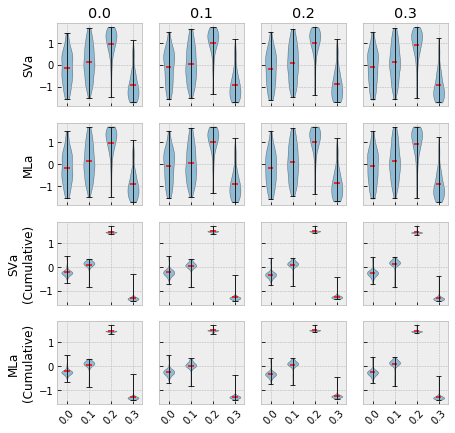

In [50]:
# parameters
SHOWMEANS = True

fig, axs = plt.subplots(4 , 4, figsize=(7, 7), sharex=True, sharey='row')

# title
if TITLE:
    fig.suptitle('CMs in P2PL vs ' + title,y=0.95, fontsize=13)

# Violin plots
parts = {}

parts[0,0] = axs[0,0].violinplot(standard(SVa[:,0,:]), showmeans=SHOWMEANS)
parts[0,1] = axs[0,1].violinplot(standard(SVa[:,1,:]), showmeans=SHOWMEANS)
parts[0,2] = axs[0,2].violinplot(standard(SVa[:,2,:]), showmeans=SHOWMEANS)
parts[0,3] = axs[0,3].violinplot(standard(SVa[:,3,:]), showmeans=SHOWMEANS)


parts[1,0] = axs[1,0].violinplot(standard(MLa[:,0,:]), showmeans=SHOWMEANS)
parts[1,1] = axs[1,1].violinplot(standard(MLa[:,1,:]), showmeans=SHOWMEANS)
parts[1,2] = axs[1,2].violinplot(standard(MLa[:,2,:]), showmeans=SHOWMEANS)
parts[1,3] = axs[1,3].violinplot(standard(MLa[:,3,:]), showmeans=SHOWMEANS)

parts[2,0] = axs[2,0].violinplot(standard(np.cumsum(SVa[:,0,:], axis=0)), showmeans=SHOWMEANS)
parts[2,1] = axs[2,1].violinplot(standard(np.cumsum(SVa[:,1,:], axis=0)), showmeans=SHOWMEANS)
parts[2,2] = axs[2,2].violinplot(standard(np.cumsum(SVa[:,2,:], axis=0)), showmeans=SHOWMEANS)
parts[2,3] = axs[2,3].violinplot(standard(np.cumsum(SVa[:,3,:], axis=0)), showmeans=SHOWMEANS)


parts[3,0] = axs[3,0].violinplot(standard(np.cumsum(MLa[:,0,:], axis=0)), showmeans=SHOWMEANS)
parts[3,1] = axs[3,1].violinplot(standard(np.cumsum(MLa[:,1,:], axis=0)), showmeans=SHOWMEANS)
parts[3,2] = axs[3,2].violinplot(standard(np.cumsum(MLa[:,2,:], axis=0)), showmeans=SHOWMEANS)
parts[3,3] = axs[3,3].violinplot(standard(np.cumsum(MLa[:,3,:], axis=0)), showmeans=SHOWMEANS)


# y labels
axs[0,0].set_ylabel('SVa')
axs[1,0].set_ylabel('MLa')
axs[2,0].set_ylabel('SVa\n(Cumulative)')
axs[3,0].set_ylabel('MLa\n(Cumulative)')

# x labels
axs[3,0].set_xticks([1,2,3,4])
axs[3,0].set_xticklabels(xticklabel, rotation=45)

axs[3,1].set_xticks([1,2,3,4])
axs[3,1].set_xticklabels(xticklabel, rotation=45)

axs[3,2].set_xticks([1,2,3,4])
axs[3,2].set_xticklabels(xticklabel, rotation=45)

axs[3,3].set_xticks([1,2,3,4])
axs[3,3].set_xticklabels(xticklabel, rotation=45)

axs[0,0].set_title(xticklabel[0])
axs[0,1].set_title(xticklabel[1])
axs[0,2].set_title(xticklabel[2])
axs[0,3].set_title(xticklabel[3])

# plot style
for i in range(4):
    for j in range(4):
        for pc in parts[i,j]['bodies']:
            #pc.set_facecolor('#FAC205')
            pc.set_edgecolor('black')
            pc.set_alpha(0.5)
        parts[i,j]['cmeans'].set_edgecolor('r')
        parts[i,j]['cmeans'].set_linewidth(1.5)
        parts[i,j]['cmins'].set_edgecolor('k')
        parts[i,j]['cmaxes'].set_edgecolor('k')
        parts[i,j]['cbars'].set_edgecolor('k')
        parts[i,j]['cbars'].set_linewidth(0.8)
        parts[i,j]['cmaxes'].set_linewidth(0.8)
        parts[i,j]['cmins'].set_linewidth(0.8)
        axs[i,j].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# save
if SAVE:
    plt.savefig('./figures/P2PL_CMs_' + subscript + '.png')
plt.show()

### History of unormalized CMs of user 1

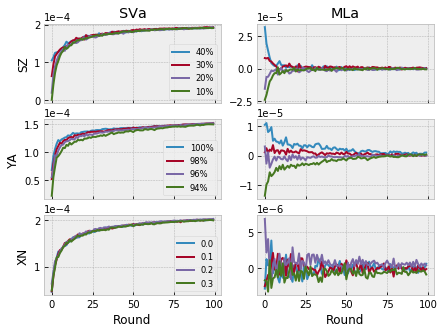

In [44]:
fig, axs = plt.subplots(3 , 2, figsize=(7, 5), sharex='col', sharey=False)

u = 3

if TITLE:
    fig.suptitle('CMs in P2PL (training history)', y=0.92)

for i in range(3):
    axs[i, 0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    axs[i, 1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axs[0,0].set_title('SVa')
axs[0,1].set_title('MLa')

# size
dill.load_session('./saves/P2PL_n4_r100_04_06_18h32/variables.pckl')
axs[0,0].plot(SVa[:,u,0])
axs[0,0].plot(SVa[:,u,1])
axs[0,0].plot(SVa[:,u,2])
axs[0,0].plot(SVa[:,u,3])

axs[0,1].plot(MLa[:,u,0])
axs[0,1].plot(MLa[:,u,1])
axs[0,1].plot(MLa[:,u,2])
axs[0,1].plot(MLa[:,u,3])

# yacc
dill.load_session('./saves/P2PL_n4_r100_04_06_20h23//variables.pckl')
axs[1,0].plot(SVa[:,u,0])
axs[1,0].plot(SVa[:,u,1])
axs[1,0].plot(SVa[:,u,2])
axs[1,0].plot(SVa[:,u,3])

axs[1,1].plot(MLa[:,u,0])
axs[1,1].plot(MLa[:,u,1])
axs[1,1].plot(MLa[:,u,2])
axs[1,1].plot(MLa[:,u,3])

# xnoise
dill.load_session('./saves/P2PL_n4_r100_04_06_21h25//variables.pckl')
axs[2,0].plot(SVa[:,u,0])
axs[2,0].plot(SVa[:,u,1])
axs[2,0].plot(SVa[:,u,2])
axs[2,0].plot(SVa[:,u,3])

axs[2,1].plot(MLa[:,u,0])
axs[2,1].plot(MLa[:,u,1])
axs[2,1].plot(MLa[:,u,2])
axs[2,1].plot(MLa[:,u,3])


axs[0,0].legend(['40%', '30%', '20%', '10%'], loc='lower right')
axs[1,0].legend(['100%', '98%', '96%', '94%'], loc='lower right')
axs[2,0].legend(['0.0', '0.1', '0.2', '0.3'], loc='lower right')

axs[0,0].set_ylabel('SZ')
axs[1,0].set_ylabel('YA')
axs[2,0].set_ylabel('XN')


axs[2,0].set_xlabel('Round')
axs[2,1].set_xlabel('Round')

if SAVE:
    plt.savefig('./figures/P2PL_CMs_hist_u{}.png'.format(u+1))

plt.show()

## Toy Example

In [117]:
plt.rc('legend', fontsize='large')
plt.style.use('default')

In [188]:
def density(x,y,rho=0, s_x=1, s_y=1):
    coef = 1/(2*s_x*s_y*np.pi*np.sqrt((1-rho**2)))
    
    return  coef * np.exp(-1/(2*(1-rho**2))*((x / s_x)**2 + (y / s_y)**2 - 2*rho*x*y /(s_x * s_y)))

def MSE(w, sigma_y, axis=1):
    return np.sum(w**2, axis=axis) + sigma_y**2

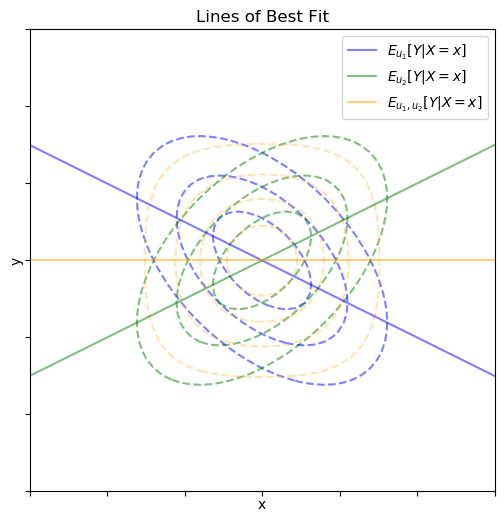

In [134]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

rho = 0.5
s_x = 1
s_y = 1

x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)


Z_plus = density(X, Y, rho, s_x, s_y)
Z_minus = density(X, Y, -rho, s_x, s_y)


Z_plus = density(X, Y, rho, s_x, s_y)
Z_minus = density(X, Y, -rho, s_x, s_y)

if TITLE:
    ax.set_title('Lines of Best Fit')
    
ax.contour(X, Y, Z_minus, colors='blue', alpha = 0.5, levels=3, linestyles='dashed')
ax.plot(x, -rho * s_y/s_x * x, color='blue', alpha = 0.5)

ax.contour(X, Y, Z_plus, colors='green', alpha = 0.5, levels=3, linestyles='dashed')
ax.plot(x, rho * s_y/s_x * x, color='green', alpha = 0.5)

ax.contour(X, Y, Z_minus+Z_plus, colors='orange', alpha = 0.3, levels=4, linestyles='dashed')
ax.plot(x, 0*x, color='orange', alpha = 0.5)

ax.legend(['$E_{u_1}[Y|X=x]$', '$E_{u_2}[Y|X=x]$', '$E_{u_1,u_2}[Y|X=x]$'])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.tick_params(left=True,bottom=True, labelleft=False, labelbottom=False)

if SAVE:
    plt.savefig('./figures/data_dist.png')
plt.show()

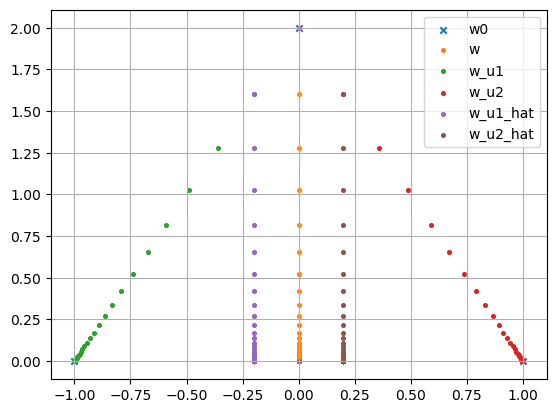

In [411]:
R    = 300
eps = 1
b0 = 2 * eps
gamma = 1e-1
rho = 0.5


w_opt = np.array([[-eps, 0], [eps, 0]])
w = np.zeros((R+1, 2))
w_ui_hat = np.zeros((R+1, 2, 2))
w_ui = np.zeros((R+1, 2, 2))

w[0] = [0, b0]
w_ui_hat[0, 0] = [0, b0]
w_ui_hat[0, 1] == [0, b0]
w_ui[0, 0] = [0, b0]
w_ui[0, 1] = [0, b0]

for r in range(1, R+1):
    w_ui[r, 0] = w[0] - 2*gamma*(np.sum(w_ui[:r, 0, :], axis=0) - r*w_opt[0])
    w_ui[r, 1] = w[0] - 2*gamma*(np.sum(w_ui[:r, 1, :], axis=0) - r*w_opt[1])
                                 
    w_ui_hat[r, 0] = w[r-1] -2*gamma*(w[r-1] - w_opt[0])
    w_ui_hat[r, 1] = w[r-1] -2*gamma*(w[r-1] - w_opt[1])   
    
    w[r] = 0.5 * (w_ui[r, 0] + w_ui[r, 1])


markersize = 7
plt.scatter([-eps, 0, eps], [0, b0, 0], s=3*markersize, marker='x')
plt.scatter(w[:, 0], w[:, 1], s=markersize)
plt.scatter(w_ui[:, 0, 0], w_ui[:, 0, 1], s=markersize)
plt.scatter(w_ui[:, 1, 0], w_ui[:, 1, 1], s=markersize)
plt.scatter(w_ui_hat[:, 0, 0], w_ui_hat[:, 0, 1], s=markersize)
plt.scatter(w_ui_hat[:, 1, 0], w_ui_hat[:, 1, 1], s=markersize)

plt.legend(['w0', 'w', 'w_u1', 'w_u2', 'w_u1_hat', 'w_u2_hat'])
plt.grid()
plt.show()

eps: 0.25 gamma 0.1 ratio 1 r_max 31
eps: 0.25 gamma 0.1 ratio 4 r_max 38
eps: 0.25 gamma 0.1 ratio 16 r_max 44
eps: 0.25 gamma 0.1 ratio 56 r_max 49
eps: 0.25 gamma 0.01 ratio 1 r_max 342
eps: 0.25 gamma 0.01 ratio 4 r_max 411
eps: 0.25 gamma 0.01 ratio 16 r_max 480
eps: 0.25 gamma 0.01 ratio 56 r_max 542
eps: 0.25 gamma 0.001 ratio 1 r_max 3451
eps: 0.25 gamma 0.001 ratio 4 r_max 4143
eps: 0.25 gamma 0.001 ratio 16 r_max 4836
eps: 0.25 gamma 0.001 ratio 56 r_max 5462
eps: 0.5 gamma 0.1 ratio 1 r_max 31
eps: 0.5 gamma 0.1 ratio 4 r_max 38
eps: 0.5 gamma 0.1 ratio 16 r_max 44
eps: 0.5 gamma 0.1 ratio 56 r_max 49
eps: 0.5 gamma 0.01 ratio 1 r_max 342
eps: 0.5 gamma 0.01 ratio 4 r_max 411
eps: 0.5 gamma 0.01 ratio 16 r_max 480
eps: 0.5 gamma 0.01 ratio 56 r_max 542
eps: 0.5 gamma 0.001 ratio 1 r_max 3451
eps: 0.5 gamma 0.001 ratio 4 r_max 4143
eps: 0.5 gamma 0.001 ratio 16 r_max 4836
eps: 0.5 gamma 0.001 ratio 56 r_max 5462
eps: 0.75 gamma 0.1 ratio 1 r_max 31
eps: 0.75 gamma 0.1 ratio 4

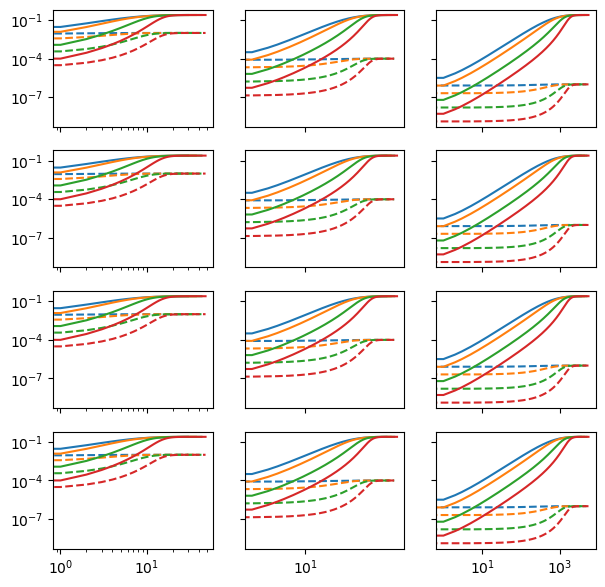

In [409]:
R_max=10000
rel_tol = 1e-3 #abs_tol = rel_tol*eps

eps = [0.25, 0.5, 0.75, 1.]
ratio = [1, 4, 16, 56]
gamma = [1e-1, 1e-2, 1e-3]
rho = [0.5]


fig, axs = plt.subplots(len(eps), len(gamma), figsize=(7,7), sharex='col', sharey=True)

#axs.semilogy(range(1,R+1), MSE(w_ui[1:,0,:], eps/rho) / MSE(w[1:], eps/rho) - 1)
#axs.semilogy(range(1,R+1), MSE(w_ui_hat[1:,0,:], eps/rho) / MSE(w[1:], eps/rho) - 1)

#eps
for i in range(len(eps)):
    
    #gamma
    for j in range(len(gamma)):
        
        #ratio
        for k in range(len(ratio)):
            b0 = eps[i] * ratio[k]
            w_opt = np.array([[-eps[i], 0], [eps[i], 0]])
            
            w = np.zeros((R_max+1, 2))
            w_ui_hat = np.zeros((R_max+1, 2, 2))
            w_ui = np.zeros((R_max+1, 2, 2))
            
            w[0] = [0, b0]
            w_ui_hat[0, 0] = [0, b0]
            w_ui_hat[0, 1] == [0, b0]
            w_ui[0, 0] = [0, b0]
            w_ui[0, 1] = [0, b0]
            
            for r in range(1, R_max+1):
                w_ui[r, 0] = w[0] - 2*gamma[j]*(np.sum(w_ui[:r, 0, :], axis=0) - r*w_opt[0])
                w_ui[r, 1] = w[0] - 2*gamma[j]*(np.sum(w_ui[:r, 1, :], axis=0) - r*w_opt[1])
                                             
                w_ui_hat[r, 0] = w[r-1] -2*gamma[j]*(w[r-1] - w_opt[0])
                w_ui_hat[r, 1] = w[r-1] -2*gamma[j]*(w[r-1] - w_opt[1])   
                
                w[r] = 0.5 * (w_ui[r, 0] + w_ui[r, 1])
                
                r_max = r        
                if np.linalg.norm(w[r]) < rel_tol * np.min([eps[i], b0]):
                    print('eps:', eps[i], 'gamma', gamma[j], 'ratio', ratio[k], 'r_max', r_max)
                    break
                elif r==R_max:
                    print('Did not converge!')
            
            psi = MSE(w_ui[1:r_max+1,0,:], eps[i]/rho[0]) / MSE(w[1:r_max+1,:], eps[i]/rho[0]) - 1
            psi_hat = MSE(w_ui_hat[1:r_max+1,0,:], eps[i]/rho[0]) / MSE(w[1:r_max+1,:], eps[i]/rho[0]) - 1
            
            theta = MSE(w_ui[1:r_max+1,0,:], eps[i]/rho[0]) - MSE(w[1:r_max+1,:], eps[i]/rho[0])
            theta_hat = MSE(w_ui_hat[1:r_max+1,0,:], eps[i]/rho[0]) - MSE(w[1:r_max+1,:], eps[i]/rho[0])
            
            color = next(axs[i,j]._get_lines.prop_cycler)['color']
            
            
        
            
            axs[i,j].plot(psi, '-', color=color)
            axs[i,j].plot(psi_hat, '--', color=color)
            axs[i,j].set_yscale('log')
            axs[i,j].set_xscale('log')
plt.show()